# Part 1 getting the City of Toronto data from Wikipedia

Install the beautiful soup, geopy and foium modules

In [1]:
!pip install bs4
!pip install geopy
!pip install folium==0.5.0

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=1e7809f923d914f54770638ac3ac36fdf81710d44fa6b4b91a1302f83d941d3c
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/

Handle the imports

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
 


Build the URL

In [3]:
# create the Wikipedia URL
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

Get the web page contents

In [4]:
wikidata = requests.get(url).text

Create a Beautiful Soup object containing the wikipedia data

In [5]:
soup = BeautifulSoup(wikidata,"html5lib")

create a list of the html tables in the BeautifulSoup object

In [6]:
table_list = soup.find_all('table')
table_index = -1
for index,table in enumerate(table_list):
    if ("Toronto" in str(table)):
        table_index = index

if (table_index == -1):
    print("Table not found")
else:
    print("The index of the table we require is ", table_index)

The index of the table we require is  0


Create a dictionary to hold the burough and neighborhood data from the table identified above 

In [7]:
toronto_neighborhoods=[]        # empty dictionary
table=table_list[table_index]

Data Cleansing:Iterate through the table. Ignore cells where the row contains 'Not assigned'

In [8]:

for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3] # postal code contains 3 characters
        cell['Borough'] = (row.span.text).split('(')[0]    # get the borough
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        toronto_neighborhoods.append(cell)



Create a dataframe containing the Toronto Neighborhood data scraped from the Wikipedia table
Further cleanse the borough column 

In [9]:
# print(table_contents)
df=pd.DataFrame(toronto_neighborhoods)

df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest',
                                             'East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


Use the .shape method to print the number of rows in the dataframe

In [10]:
df.shape

(103, 3)

# Part 2 - Getting Latitude/Longitude coordinates for the Toronto postal codes

Use the provided csv (I had difficulty with the geocoder package) to create a dataframe with 5 columns: PostalCode, Borough, Neighborhood, Latitude, Longitude

<b>First get the csv file using wget</b>

In [11]:
!wget -O Geospatial_Coordinates.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv

--2021-07-15 16:50:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2788 (2.7K) [text/csv]
Saving to: ‘Geospatial_Coordinates.csv’

Geospatial_Coordina 100%[===================>]   2.72K  --.-KB/s    in 0s      

2021-07-15 16:50:40 (29.0 MB/s) - ‘Geospatial_Coordinates.csv’ saved [2788/2788]



<b>Use Pandas read_csv to read the provided data file</b>

In [12]:
coord_df = pd.read_csv("Geospatial_Coordinates.csv")
coord_df.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


<b>Rename "Postal Code" to have the same as name the column in the data frame from part 1</b>

In [13]:
coord_df.rename(columns={'Postal Code': 'PostalCode'})

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


<b> Merge the two dataframes on the postal code column </b>

In [14]:
dfToronto = df.merge(coord_df, left_on='PostalCode', right_on='Postal Code')

<b>Drop the redundant "Postal Code" column</b>


In [15]:
dfToronto

,PostalCode,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",M5A,43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",M6A,43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,M7A,43.662301,-79.389494
...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",M8X,43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,M4Y,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,M7Y,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",M8Y,43.636258,-79.498509



<b>Drop the redundant "Postal Code" column</b>


In [16]:
dfToronto.drop(columns=['Postal Code'], inplace=True)

<b>Display rows 0 through 11 and ensure they match the instructions</b>

In [17]:
dfToronto.head(12)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


# Part 3 Explore the neighborhoods - find top venues using the Foursquare API

Visualize the neighbourhoods by superimposiung them on a Folium map of Toronto, then identify the venues within 500 meters of each neighborhood (max 100) and use k-means clustering to cluster the venues by venue category (park, Italian restaurant, community center, etc.)

Get the lat/long coordinates of the City of Toronto

In [82]:
from geopy import Nominatim
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import folium
print ('Libraries imported successfully')

Libraries imported successfully


In [21]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical cooridnate of Toronto, ON are {}, {}.'.format(latitude,longitude))

The geographical cooridnate of Toronto, ON are 43.6534817, -79.3839347.


To simplify the mapping and reduce the number of neighborhoods, slice the dataframe by selecting boroughs with the word 'Toronto' in them

In [52]:
dfToronto_reduced=dfToronto.loc[dfToronto['Borough'].str.contains("Toronto")].reset_index(drop=-True)

Drop the postal code column from the dataframe

In [55]:
neighborhoods = dfToronto_reduced.drop(columns=['PostalCode'])
neighborhoods.shape
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,Downtown Toronto,St. James Town,43.651494,-79.375418
3,East Toronto,The Beaches,43.676357,-79.293031
4,Downtown Toronto,Berczy Park,43.644771,-79.373306


Determine how many unique boroughs and neighbourhoods we are left with

In [54]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 7 boroughs and 39 neighborhoods.


Visualize the location of the neighborhoods by superimposing them onto a map of Toronto

Find the geo-coordinates of Toronto, ON in order to generate a map

In [47]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location   = geolocator.geocode(address)
latitude   = location.latitude
longitude  = location.longitude
print('The geographical location of Toronto, ON are {}, {}.'.format(latitude,longitude))

The geographical location of Toronto, ON are 43.6534817, -79.3839347.


Create a map of Toronto

In [58]:
#use latitude and longitude to create a map of Toronto
map_toronto = folium.Map(location=[latitude, longitude], zoom_start = 12)

#add markers for the neighborhoods
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'],neighborhoods['Longitude'],neighborhoods['Borough'],neighborhoods['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
map_toronto

Use the Foursquare API to explore the neighborhoods and segment them according to Foursquare category

In [59]:
CLIENT_ID = '************************************************'     # replaced with asterisks before publishing for security
CLIENT_SECRET = '************************************************' # replaced with asterisks before publishing for security
ACCESS_TOKEN = '************************************************'  # replaced with asterisks before publishing for security

VERSION = '20210602' # Foursquare API version
LIMIT = 100 # max number of venues per neighborhood  
RADIUS = 500

Use the function from the New York Neighborhoods lab to get the venues for all neighborhoods

In [62]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            RADIUS, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Call the function for all neighborhoods in the neighborhoods dataframe

In [64]:
toronto_venues = getNearbyVenues(names=neighborhoods['Neighborhood'], latitudes=neighborhoods['Latitude'], longitudes=neighborhoods['Longitude'])
toronto_venues.shape

Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Enclave of M5E
St. James Town, Cabbagetown
First Canadi

(1601, 7)

Check how the data looks

In [65]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


Check the count of venues per neighborhood

In [66]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",18,18,18,18,18,18
Central Bay Street,62,62,62,62,62,62
Christie,16,16,16,16,16,16
Church and Wellesley,81,81,81,81,81,81
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,35,35,35,35,35,35
Davisville North,10,10,10,10,10,10


Find how many unique categories are included in the venues

In [68]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 240 uniques categories.


Analyze each neighborhood using One-Hot encoding

In [70]:
# one-hot encode the dataframe
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

#toronto_onehot.head()
toronto_onehot.shape

(1601, 240)

Group the rows by neighbourhood and get the average frequency of occurrence of each category

In [71]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.017241,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.055556,0.055556,0.055556,0.111111,0.166667,0.111111,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,Central Bay Street,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.016129,0.000000,0.000000,0.000000,0.000000
4,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
5,Church and Wellesley,0.024691,0.012346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012346,...,0.012346,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000
7,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,...,0.000000,0.00000,0.028571,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Dufferin, Dovercourt Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.066667


Print each neighborhood with the top 5 most common venues with each one

In [73]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0        Bakery  0.05
1   Coffee Shop  0.05
2  Cocktail Bar  0.05
3           Pub  0.03
4      Beer Bar  0.03


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.12
1  Breakfast Spot  0.08
2     Coffee Shop  0.08
3    Climbing Gym  0.04
4       Nightclub  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.17
1    Airport Lounge  0.11
2  Airport Terminal  0.11
3          Boutique  0.06
4   Harbor / Marina  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1                Café  0.05
2  Italian Restaurant  0.05
3      Sandwich Place  0.05
4     Bubble Tea Shop  0.03


----Christie----
                venue  freq
0       Grocery Store  0.25
1                Café  0.19
2                Park  0.12
3  Italian Restaurant  0.06
4         Coffee Sho

Add the data to a dataframe using a function to sort the venues in descending order

In [74]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

create the new dataframe and display the top 10 venues for each neighborhood

In [86]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Cocktail Bar,Coffee Shop,Bakery,Cheese Shop,Restaurant,Pharmacy,Pub,Seafood Restaurant,Farmers Market,Beer Bar
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Pet Store,Bakery,Office,Performing Arts Venue,Nightclub,Climbing Gym,Restaurant
2,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Coffee Shop,Bar,Plane,Rental Car Location,Sculpture Garden,Boutique,Boat or Ferry
3,Central Bay Street,Coffee Shop,Sandwich Place,Café,Italian Restaurant,Bubble Tea Shop,Burger Joint,Restaurant,Japanese Restaurant,Salad Place,Portuguese Restaurant
4,Christie,Grocery Store,Café,Park,Nightclub,Italian Restaurant,Restaurant,Baby Store,Candy Store,Athletics & Sports,Coffee Shop


* The neighbourhoods_venues_sorted dataframe provides the types of venues most frequently found in each neighborhood

Cluster the neighborhoods using k-means

In [ ]:
Determine the optimal 'K' number based on the elbow method

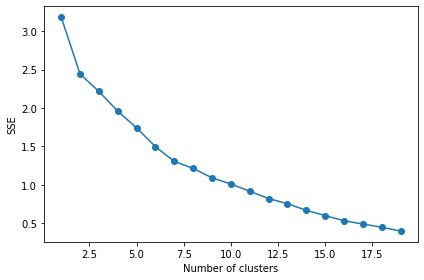

In [87]:
neighb_clusters = toronto_grouped.drop('Neighborhood', axis=1)

X = neighb_clusters

sse = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    sse.append(km.inertia_)
    
# plot the distortion for number of clusters   
plt.plot(range(1, 20), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.tight_layout()


plt.show()

In [ ]:
The elbow appears to be between 5 and 7.5.  We will use 7

In [93]:
# set number of clusters
kclusters = 7

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
kmeans_labels = kmeans.labels_ 
# check cluster labels generated for each row in the dataframe
kmeans_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 5, 0, 1,
       0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 6, 2, 0, 0, 0], dtype=int32)

In [ ]:
store the data in a new dataframe along with top 10 venues in each neighborhood

In [89]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = neighborhoods

# merge toronto_grouped with the neighborhoods data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() 

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Bakery,Park,Pub,Theater,Café,Breakfast Spot,Bank,Dessert Shop,Mexican Restaurant
1,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Cosmetics Shop,Japanese Restaurant,Middle Eastern Restaurant,Bubble Tea Shop,Café,Diner,Ramen Restaurant,Bookstore
2,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Café,Coffee Shop,Cosmetics Shop,Restaurant,Cocktail Bar,Creperie,Art Gallery,Farmers Market,Beer Bar,Bakery
3,East Toronto,The Beaches,43.676357,-79.293031,6,Pub,Health Food Store,Trail,Wine Shop,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Eastern European Restaurant
4,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Cocktail Bar,Coffee Shop,Bakery,Cheese Shop,Restaurant,Pharmacy,Pub,Seafood Restaurant,Farmers Market,Beer Bar


Visualize the resulting clusters

In [108]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' Color ' + str(rainbow[cluster-1]), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        Marker=str(cluster),
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
colors_array
map_clusters

The map suggests a distinction between the south east waterfront district and the other districts around it.  Further exploration of each cluster may provide more insights into this.


In [107]:
print ('Done!!')

Done!!
